In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import sqlite3

In [4]:
con = sqlite3.connect('meetup.db')
cursor = con.cursor()

Let's peek at the schema. Limit to just first 30 rows.

Event can be viewed with URL https://www.meetup.com/{group_name}/events/{event_id}/

For example, https://www.meetup.com/1-5GenAsians/events/281289732/

In [5]:
data = cursor.execute("select * from event limit 30;")
print(tabulate(data.fetchall(), headers=["Event ID", "Status",'Event Date', 'RSVP Count', "Link"], tablefmt='psql'))

+------------+----------+--------------+--------------+-------------------------------------------------------+
|   Event ID | Status   | Event Date   |   RSVP Count | Link                                                  |
|------------+----------+--------------+--------------+-------------------------------------------------------|
|  109370632 | past     | 2013-03-22   |            5 | https://www.meetup.com/1-5GenAsians/events/109370632/ |
|  109868492 | past     | 2013-03-23   |            6 | https://www.meetup.com/1-5GenAsians/events/109868492/ |
|  111080172 | past     | 2013-03-30   |           11 | https://www.meetup.com/1-5GenAsians/events/111080172/ |
|  111088522 | past     | 2013-03-30   |            3 | https://www.meetup.com/1-5GenAsians/events/111088522/ |
|  110749042 | past     | 2013-03-31   |            8 | https://www.meetup.com/1-5GenAsians/events/110749042/ |
|  111871212 | past     | 2013-04-05   |           10 | https://www.meetup.com/1-5GenAsians/events/11187

Let's see some of the most popular events. I define this to be events with the most RSVP.

In [6]:
data = cursor.execute("select event_date, rsvp_count, link from event order by rsvp_count desc limit 30;")
print(tabulate(data.fetchall(), headers=['Event Date', 'RSVP Count', 'Link'], tablefmt='psql'))

+--------------+--------------+-------------------------------------------------------+
| Event Date   |   RSVP Count | Link                                                  |
|--------------+--------------+-------------------------------------------------------|
| 2015-03-01   |          109 | https://www.meetup.com/1-5GenAsians/events/219920453/ |
| 2014-11-02   |          105 | https://www.meetup.com/1-5GenAsians/events/212049012/ |
| 2016-10-09   |          102 | https://www.meetup.com/1-5GenAsians/events/233570064/ |
| 2016-04-30   |           85 | https://www.meetup.com/1-5GenAsians/events/230305968/ |
| 2019-12-21   |           83 | https://www.meetup.com/1-5GenAsians/events/266398172/ |
| 2018-03-24   |           82 | https://www.meetup.com/1-5GenAsians/events/248285057/ |
| 2018-06-10   |           80 | https://www.meetup.com/1-5GenAsians/events/250424473/ |
| 2021-08-29   |           69 | https://www.meetup.com/1-5GenAsians/events/279628714/ |
| 2014-08-17   |           57 | 

In [7]:
data = cursor.execute("select count(*) from event;")
print(f"Total number of events is {data.fetchone()[0]}")

Total number of events is 814


Let's see the number of events we have for each month

In [8]:
num_event_per_month = list(cursor.execute("""select strftime('%Y-%m', event_date), count(*) from event 
    group by strftime('%Y-%m', event_date);"""))
print(tabulate(num_event_per_month, headers=['Month', 'Number of Events'], tablefmt='psql'))

+---------+--------------------+
| Month   |   Number of Events |
|---------+--------------------|
| 2013-03 |                  5 |
| 2013-04 |                  5 |
| 2013-05 |                  5 |
| 2013-06 |                  5 |
| 2013-07 |                  5 |
| 2013-08 |                  4 |
| 2013-09 |                  4 |
| 2013-10 |                  7 |
| 2013-11 |                  9 |
| 2013-12 |                  6 |
| 2014-01 |                  7 |
| 2014-02 |                  3 |
| 2014-03 |                  3 |
| 2014-04 |                  7 |
| 2014-05 |                 11 |
| 2014-06 |                  4 |
| 2014-07 |                  3 |
| 2014-08 |                  4 |
| 2014-09 |                  4 |
| 2014-10 |                  8 |
| 2014-11 |                  4 |
| 2014-12 |                  2 |
| 2015-01 |                  6 |
| 2015-02 |                  6 |
| 2015-03 |                  6 |
| 2015-04 |                  4 |
| 2015-05 |                  3 |
| 2015-06 

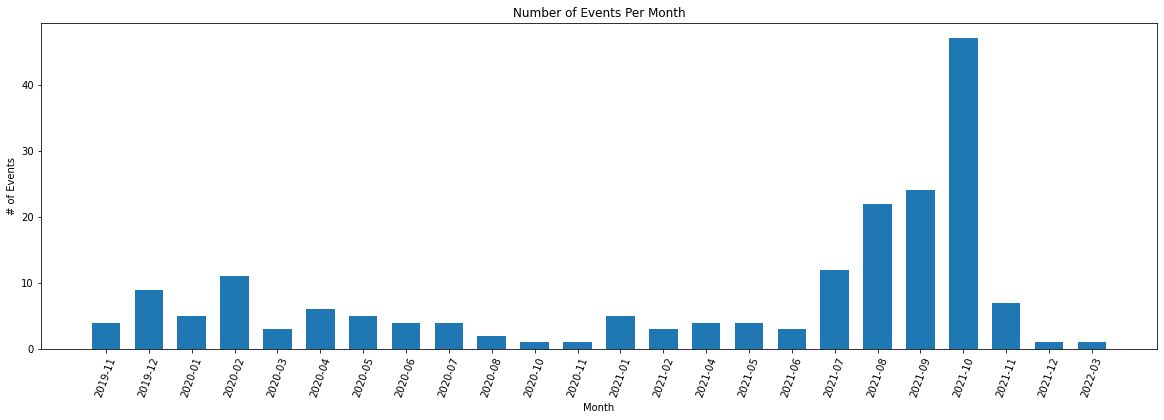

In [9]:
num_event_per_month = list(num_event_per_month)[-24:]
x = range(len(num_event_per_month))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, [r[1] for r in num_event_per_month], width, align="center")
axes.set_xticks(x)
axes.set_xticklabels([r[0] for r in num_event_per_month])
axes.set_title("Number of Events Per Month")
axes.set_xlabel("Month")
axes.set_ylabel("# of Events")
axes.xaxis.grid(False)

plt.setp(axes.xaxis.get_majorticklabels(), rotation=70)
plt.show()
plt.close();